In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

home_dir = str(Path.home())

In [2]:
def eye_to_csv(eye_path, csv_path):
    with open(eye_path, 'r') as eye_file, open(csv_path, 'w', newline='') as csv_file:
        writer = csv.writer(csv_file)
        # Optionally write a header
        writer.writerow([
            'pos_x', 'pos_y', 'pos_z',
            'dir_x', 'dir_y', 'dir_z',
            'acceptance_angle', 'focalpoint_offset'
        ])
        for line in eye_file:
            # Split and convert each value to float
            values = [float(x) for x in line.strip().split()]
            writer.writerow(values)

In [3]:
eye_to_csv(home_dir+'/compound-ray/data/ofstad-arena/1000-equidistant.eye', 'output.csv')

In [4]:
x = []
y = []
z = []
with open('output.csv', 'r') as f:
    reader = csv.reader(f)
    next(reader)
    for row in reader:
        x.append(float(row[0]))
        y.append(float(row[1]))
        z.append(float(row[2]))

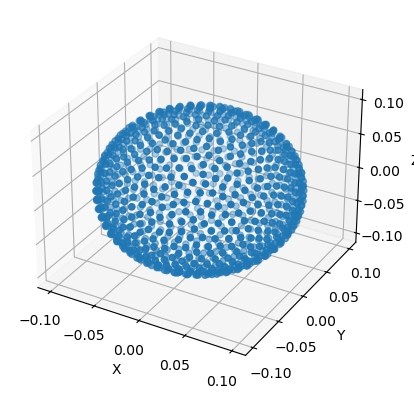

In [5]:
fig, ax = plt.subplots(subplot_kw={'projection':'3d'})

ax.scatter(np.array(x), np.array(y), np.array(z))
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [6]:
# Write a new eye
import sys
sys.path.append('/groups/turaga/home/kimb2/compound-ray/python-examples')
import eyeRendererHelperFunctions as eyeTools

def csv_to_eye(csv_path, eye_path, skip_header=True):
    omms = []
    with open(csv_path, 'r') as csvfile:
        reader = csv.reader(csvfile)
        if skip_header:
            next(reader)
        for row in reader:
            # Convert all values to float
            values = [float(x) for x in row]
            if values[2] > 0.0:
                position = np.array(values[:3])
                direction = np.array(values[3:6])
                acceptance_angle = values[6]
                focalpoint_offset = values[7]
                omms.append(eyeTools.Ommatidium(position, direction, acceptance_angle, focalpoint_offset))
    eyeTools.saveEyeFile(eye_path, omms)

In [7]:
csv_to_eye('output.csv', home_dir+'/compound-ray/data/ofstad-arena/half-1000-equidistant.eye')